# Завдання 1. Представити початковi данi графiчно.


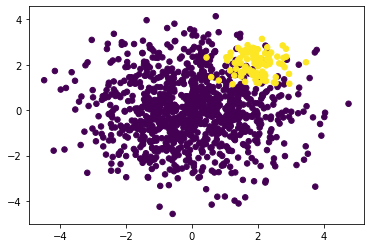

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import animation
import matplotlib.pyplot as plt
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples = [n_samples_1, n_samples_2],
                 centers = centers,
                cluster_std = clusters_std, 
                 random_state = 0, shuffle = False)
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=15)
ax = plt.gca()
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30, c=y)
ax = plt.gca()

# Завдання 2. Розбити данi на навчальний та валiдацiйний набори.

In [3]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Завдання 3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# tree = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=20, max_features = 5).fit(X, y)
model = tree.DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf = 5, min_samples_split = 5, max_features = 2)
# parameters = {}
model = model.fit(X, y)

# 4. Представити моделi графiчно (наприклад вивести частину дерева рiшень, побудувати лiнiю регресiї тощо).

[Text(190.65, 195.696, 'X[0] <= 1.48\ngini = 0.165\nsamples = 1100\nvalue = [1000, 100]'),
 Text(102.30000000000001, 152.208, 'X[0] <= 1.042\ngini = 0.036\nsamples = 878\nvalue = [862, 16]'),
 Text(37.2, 108.72, 'X[0] <= 0.438\ngini = 0.008\nsamples = 770\nvalue = [767, 3]'),
 Text(18.6, 65.232, 'gini = 0.0\nsamples = 635\nvalue = [635, 0]'),
 Text(55.800000000000004, 65.232, 'X[1] <= 1.277\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(74.4, 21.744, 'gini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(167.4, 108.72, 'X[1] <= 1.731\ngini = 0.212\nsamples = 108\nvalue = [95, 13]'),
 Text(130.20000000000002, 65.232, 'X[1] <= 1.081\ngini = 0.045\nsamples = 87\nvalue = [85, 2]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(148.8, 21.744, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(204.60000000000002, 65.232, 'X[0] <= 1.202\ngini = 0.499\nsamples = 21\nvalue = [10, 

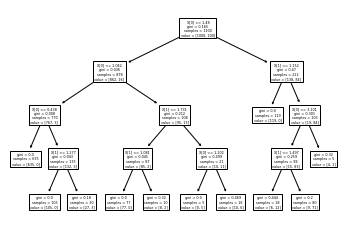

In [5]:
tree.plot_tree(model)

# 5. Виконати прогнози на основi побудованих моделей.

<ipython-input-6-0c45eca06481>:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


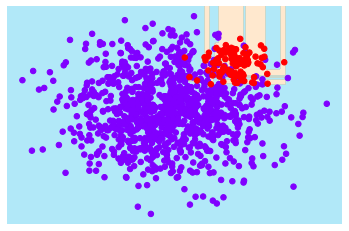

In [6]:
import numpy as np
from matplotlib import animation
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
# Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
    clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 # Обучаем оцениватель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
 # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap, clim=(y.min(), y.max()),
    zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(), X, y)


In [7]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
y2_model = model.predict(X_test)
accuracy_score(y_test, y2_model)

0.9772727272727273

# Завдання 6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

# Для перевірки перенавчання можна використати cross-validation 


In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.93636364, 0.95      , 0.96818182, 0.96363636, 0.97272727])

# Також, крива перевірки допомагає вирішити компроміс між систематичною помилкою і дисперсією моделі.


# Завдання 8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

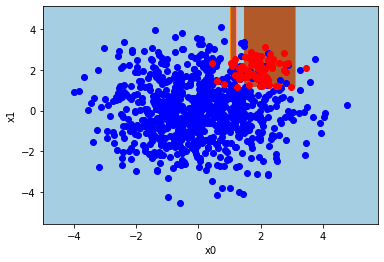

In [9]:
import numpy as np

plot_step = 0.02
n_classes = 11
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plot_colors = "bry"
X  = X_test[:, np.newaxis]
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel('x0')
plt.ylabel('x1')
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired)

plt.show()

# Завдання 9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:

 - матрицю неточностей (confusion matrix)

Text(91.68, 0.5, 'true value')

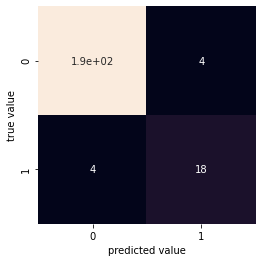

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y2_model)
sns.heatmap(mat, square = True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

Text(91.68, 0.5, 'true value')

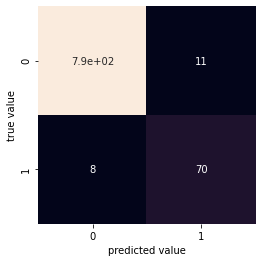

In [12]:
y1_model = model.predict(X_train)
mat = confusion_matrix(y_train, y1_model)
sns.heatmap(mat, square = True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


 - точність (precision)

In [13]:
from sklearn.metrics import precision_score
y1 = model.predict(X_train)
y2 = model.predict(X_test)
a = precision_score(y_train, y1)
b = precision_score(y_test, y2)
print(a)
print(b)

0.8641975308641975
0.8181818181818182


- повноту (recall)

In [14]:
from sklearn.metrics import recall_score
c = recall_score(y_train, y1)
d = recall_score(y_test, y2)
print(c)
print(d)

0.8974358974358975
0.8181818181818182


- мiру F1 (F1 score)

In [15]:
from sklearn.metrics import f1_score
e = f1_score(y_train, y1)
f = f1_score(y_test, y2)
print(e)
print(f)

0.880503144654088
0.8181818181818182


- криву точностi-повноти (precision-recall (PR) curve)

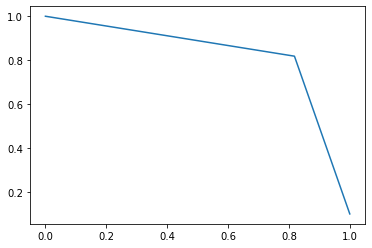

In [16]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y2)
plt.plot(recall, precision)


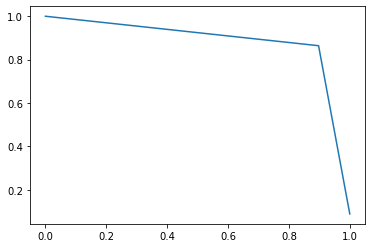

In [17]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train,y1)
plt.plot(recall, precision)

- ROC-криву

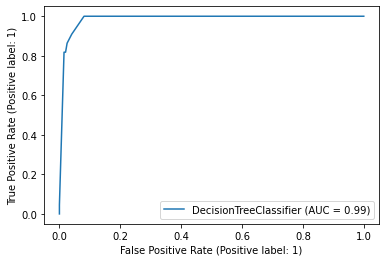

In [18]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test) 
plt.show()

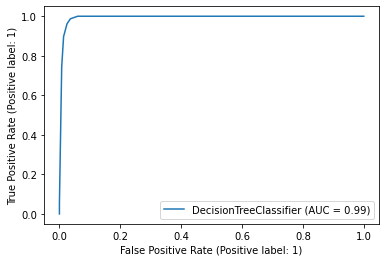

In [19]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_train, y_train) 
plt.show()

- auc показник

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y1)

0.9418600933563527

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y2)

0.898989898989899

# Завдання  11. grid search

In [22]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9636363636363636
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
model = grid.best_estimator_
print('Test accuracy: %.3f' % model.score(X_test, y_test))

Test accuracy: 0.959


In [26]:
x = range(0, 1100)
kf = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 1)
for train_indices, test_indices in kf.split(X):
    print(train_indices, test_indices)

[  1   2   3   5   6   7   8   9  10  12  13  14  15  17  20  21  22  23
  24  25  26  27  30  32  36  37  40  41  42  43  45  46  47  48  49  50
  51  52  53  54  55  56  57  59  60  61  63  64  65  66  68  69  70  71
  72  74  75  76  77  79  80  81  82  83  84  86  87  90  92  93  94  95
  96  97  99 100 101 103 104 106 107 109 110 111 112 113 114 115 116 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 139 140 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156
 157 158 159 160 161 162 165 167 168 169 170 171 172 173 174 175 176 177
 178 181 182 184 185 187 188 189 191 192 193 194 195 196 198 200 201 202
 203 204 205 206 208 209 210 211 212 214 216 217 218 219] [  0   4  11  16  18  19  28  29  31  33  34  35  38  39  44  58  62  67
  73  78  85  88  89  91  98 102 105 108 117 138 150 163 164 166 179 180
 183 186 190 197 199 207 213 215]
[  0   1   2   3   4   6   7   8   9  10  11  12  13  15  16  18  19  20
  22  23  24  25  26  28  29  30

На основі деяких критеріїв обрали найкращу модель. Розмір навчальної множини краще вибирати 20/80 по відношенню до тестової множини.


# Варіант Б
# Завдання 1. Представити початковi данi графiчно.

(500, 2)
(500,)


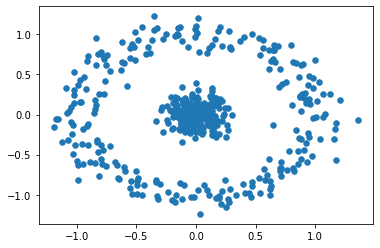

In [234]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=.1, noise=.1)
#print(X)
print(X.shape)
print(y.shape)
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=30)
ax = plt.gca()

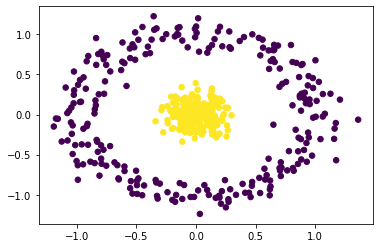

In [235]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30, c=y)
ax = plt.gca()

# Завдання 2. Розбити данi на навчальний та валiдацiйний набори.

In [256]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
len(y_train)

400

# Завдання 3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

In [237]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=5, min_samples_leaf = 1, min_samples_split = 2,
                                  max_leaf_nodes = 10, max_features = 2)
# parameters = {}
clf = clf.fit(X, y)


# Завдання 4. Представити моделi графiчно (наприклад вивести частину дерева рiшень, побудувати лiнiю регресiї тощо).

[Text(141.64615384615385, 199.32, 'X[1] <= -0.3\nentropy = 1.0\nsamples = 500\nvalue = [250, 250]'),
 Text(51.50769230769231, 163.07999999999998, 'X[1] <= -0.339\nentropy = 0.078\nsamples = 105\nvalue = [104, 1]'),
 Text(25.753846153846155, 126.83999999999999, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0]'),
 Text(77.26153846153846, 126.83999999999999, 'X[1] <= -0.338\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(51.50769230769231, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(103.01538461538462, 90.6, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(231.7846153846154, 163.07999999999998, 'X[1] <= 0.236\nentropy = 0.95\nsamples = 395\nvalue = [146, 249]'),
 Text(180.27692307692308, 126.83999999999999, 'X[0] <= 0.474\nentropy = 0.588\nsamples = 283\nvalue = [40, 243]'),
 Text(154.52307692307693, 90.6, 'X[0] <= -0.589\nentropy = 0.375\nsamples = 262\nvalue = [19, 243]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'

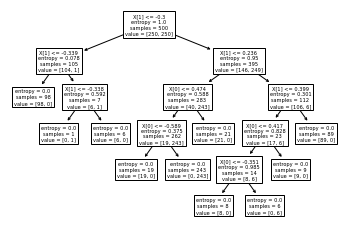

In [238]:
tree.plot_tree(clf)


# Завдання 5. Виконати прогнози на основi побудованих моделей.

In [258]:
y2_model = clf.predict(X_test)
accuracy_score(y_test, y2_model)

1.0

In [259]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
parametrs = { 'criterion':['gini', 'entropy'],
             'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10, 2)
             
            }
grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.985
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


# Завдання 6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [260]:
cross_val_score(clf, X, y, cv=5)

array([0.99, 0.98, 0.99, 0.98, 1.  ])

# Завдання 8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

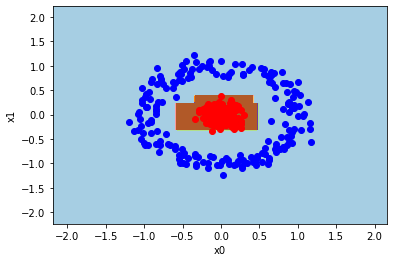

In [261]:
plot_step = 0.02
n_classes = 11
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plot_colors = "bry"
X  = X_test[:, np.newaxis]
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel('x0')
plt.ylabel('x1')
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired)

plt.show()

# Завдання 9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:

• матрицю неточностей (confusion matrix)

Text(91.68, 0.5, 'true value')

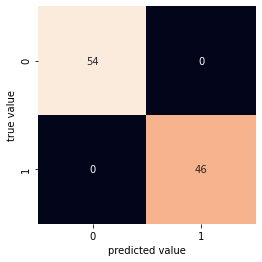

In [262]:
mat = confusion_matrix(y_test, y2_model)
sns.heatmap(mat, square = True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

y1_model = clf.predict(X_train)
mat = confusion_matrix(y_train, y1_model)
sns.heatmap(mat, square = True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


• точнiсть (precision)

In [263]:
y1 = clf.predict(X_train)
y2 = clf.predict(X_test)
a = precision_score(y_train, y1)
b = precision_score(y_test, y2)
print(a)
print(b)

1.0
1.0


• повноту (recall)

In [264]:
from sklearn.metrics import recall_score
c = recall_score(y_train, y1)
d = recall_score(y_test, y2)
print(c)
print(d)

1.0
1.0


• мiру F1 (F1 score)


In [265]:
from sklearn.metrics import f1_score
e = f1_score(y_train, y1)
f = f1_score(y_test, y2)
print(e)
print(f)

1.0
1.0


• побудувати криву точностi-повноти (precision-recall (PR) curve)

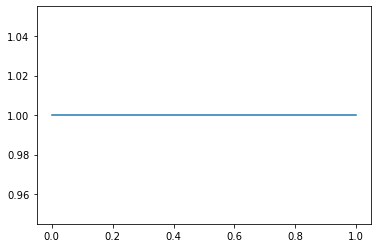

In [267]:
precision, recall, thresholds = precision_recall_curve(y_test,y2)
plt.plot(recall, precision)

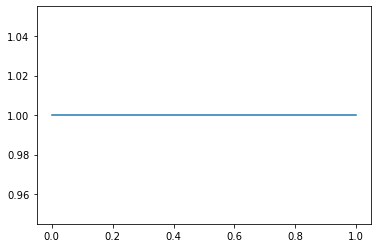

In [268]:
precision, recall, thresholds = precision_recall_curve(y_train,y1)
plt.plot(recall, precision)

- ROC-криву

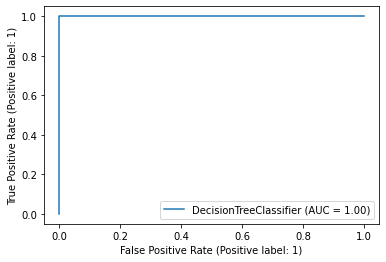

In [271]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

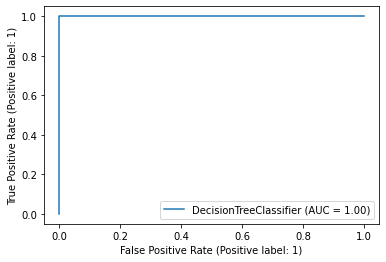

In [273]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_train, y_train) 
plt.show()

- показник AUC.

In [275]:
roc_auc_score(y_train, y1)

1.0

In [277]:
roc_auc_score(y_test, y2)

1.0

# Завдання 11. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

In [278]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'criterion':['gini', 'entropy'],
             'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10, 2)
             
            }
grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.985
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [281]:
model = grid.best_estimator_
print('Test accuracy: %.3f' % model.score(X_test, y_test))

Test accuracy: 1.000


На даному датасеті модель з підібраними гіперпараметрами спрацювала ідеально.